In [1]:
## Stanford MCMC decoding

import numpy as np
import matplotlib.pyplot as plt

## Idea is to first get some sort of prior distribution for how likely characters are to follow each other
## If you are working with a simple substitution cipher i.e. one character = another character, one to one correspondence

# So, need to download some massive text document, and record how likely it is for one character to follow another
# Need program to record the counts and put this into a transition matrix

filepath = 'warAndPeace.txt'

# Define the characters or patterns you want to replace with spaces
charactersToReplace = ['"', "'", '--', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', \
    '-', '_', '=', '+', '[', ']', '{', '}', ';', ':', ',', '.', '/', '?', '<', '>', '|', \
        '\n', '\t', 'à', 'ä', 'é', 'ê']

with open(filepath, 'r') as file:

    text = file.read().lower()
    text = ''.join(' ' if char in charactersToReplace else char for char in text) # Replace characters with spaces using a generator expression
    text = ''.join(char for char in text if not char.isdigit())

textArray = np.array(list(text))
uniqueCharacters = np.unique(textArray)

# Now that we have removed all of the unwanted characters from the text, we can count the transitions

epsilon = .00001
transitionMatrix = np.zeros([len(uniqueCharacters), len(uniqueCharacters)]) + epsilon
numCharacters = 3000000

for charIndex in range(numCharacters):

    currentChar = text[charIndex]
    nextChar = text[charIndex + 1]
    tempTransitionRow = np.where(currentChar == uniqueCharacters)
    tempTransitionCol = np.where(nextChar == uniqueCharacters)
    transitionMatrix[tempTransitionRow, tempTransitionCol] += 1

# Normalizing

for iiRow in range(np.shape(transitionMatrix)[0]):

    transitionMatrix[iiRow, :] = transitionMatrix[iiRow, :] / np.sum(transitionMatrix[iiRow, :])


FileNotFoundError: [Errno 2] No such file or directory: 'warAndPeace.txt'

In [ ]:
plt.plot(np.array(range(np.shape(transitionMatrix)[0])), np.sum(transitionMatrix, 1), color = 'red')

In [35]:
## Now that we have the transition matrix, we can calculate the plausibility/likelihood of each coded text
# First create a simple substitution cypher

import random
import numpy as np
import sys 

alphabet = ' abcdefghijklmnopqrstuvwxyz'

def makeRandomKey():

    tempList = list(alphabet)
    random.shuffle(tempList)
    randomKey = dict(zip(alphabet, tempList))

    return randomKey

#textString = 'in god we trust all others must bring data and all models are wrong but some are useful and there is no such thing as a causal effect'
textString = 'it was as if a light had been lit in a carked and vainted lanter and the intricate smillful artistic worm on its sides the selection of the best paterials and the exvert wormpanshiv of its construction were brought out by the light but the light was too intense and his eyes shone with it'
cypherKey = makeRandomKey()

# Use the cypher on the string
cypher = []

for charIndex in range(len(textString)):

    currentChar = textString[charIndex]
    tempTargetChar = cypherKey[currentChar]
    cypher.append(tempTargetChar)

cypher = ''.join(cypher)

## Using your deciphering method for a known cypher

numChars = len(cypher)
decodedCypher = []

for jjChar in range(numChars):

    tempChar = cypher[jjChar]
    tempDecodedLetter = [key for key, value in cypherKey.items() if value == tempChar][0]
    decodedCypher.append(tempDecodedLetter[0])

decodedCypher = ''.join(decodedCypher)
print(cypher)
print(decodedCypher)
machineEpsilon = sys.float_info.epsilon


klzwklbfzxbvedvbraerbeiibgzmlivbewlbfembforbvzglbewlbovl oibesmbeszralwb egzovbgeralgercjcesbvedvbraerbcsbkzmbplbrwovrbforbltlwdzslblivlbgovrbfwcskbmere
george box says that all models are bad but some are useful and another famous mathematician says that in god we trust but everyone else must bring data


In [36]:
def proposeNewKey(key):

    pair = random.sample(alphabet, 2)
    newKey = dict(key)
    newKey[pair[0]] = key[pair[1]]
    newKey[pair[1]] = key[pair[0]]

    return newKey

exampleKey = makeRandomKey()
proposedKey = proposeNewKey(exampleKey)

print(exampleKey)
print(proposedKey)

# Consider changing the transition matrix to a dictionary of character pairs as well and the value is the probability 

{' ': 'w', 'a': 'a', 'b': 'o', 'c': 'k', 'd': 'f', 'e': 'e', 'f': 'i', 'g': 'm', 'h': 'd', 'i': 'b', 'j': 't', 'k': 's', 'l': ' ', 'm': 'q', 'n': 'u', 'o': 'j', 'p': 'l', 'q': 'g', 'r': 'n', 's': 'p', 't': 'c', 'u': 'h', 'v': 'y', 'w': 'r', 'x': 'z', 'y': 'v', 'z': 'x'}
{' ': 'w', 'a': 'a', 'b': 'o', 'c': 'k', 'd': 'f', 'e': 'e', 'f': 'i', 'g': 'm', 'h': 'd', 'i': 'b', 'j': 't', 'k': 's', 'l': 'p', 'm': 'q', 'n': 'u', 'o': 'j', 'p': 'l', 'q': 'g', 'r': 'n', 's': ' ', 't': 'c', 'u': 'h', 'v': 'y', 'w': 'r', 'x': 'z', 'y': 'v', 'z': 'x'}


In [37]:
## Now you can use the algorithm to start decoding

## THE PROBLEM IS THAT YOU ARE ACCEPTING EVERY CANDIDATE MOVE
# THE ISSUE MAY BE WITH THE COPY INSTANCE? MAKE SURE YOU ARE PROPERLY CHANGING TARGET CHARACTERS

numIterations = 50000
numChars = len(cypher)
codeSpace = makeRandomKey()
accept = np.zeros([numIterations])
acceptanceProbabilities = np.zeros([numIterations])
plausibility = np.zeros([numIterations])

for iiIteration in range(numIterations):

    tempTransitionProbs = np.zeros([numChars - 1, 1])

    for jjChar in range(numChars - 1):

        currentChar = cypher[jjChar]
        nextChar = cypher[jjChar + 1]
        rowIndex = np.where(uniqueCharacters == [key for key, value in codeSpace.items() if value == currentChar])[0][0]
        columnIndex = np.where(uniqueCharacters == [key for key, value in codeSpace.items() if value == nextChar])[0][0]
        tempTransitionProbs[jjChar] = transitionMatrix[rowIndex, columnIndex]

    for jjProb in range(np.size(tempTransitionProbs)):

        if tempTransitionProbs[jjProb] < machineEpsilon:

            tempTransitionProbs[jjProb] = machineEpsilon

    currentPlausibility = np.sum(np.log(tempTransitionProbs))
    plausibility[iiIteration] = currentPlausibility

    # MIGHT BE A PROBLEM WITH HOW YOU ARE TREATING CANDIDATE = TARGET, MUTABLE?

    candidateCodeSpace = proposeNewKey(codeSpace)
    candidateTransitionProbs = np.zeros([numChars - 1, 1])

    for jjChar in range(numChars - 1):

        currentChar = cypher[jjChar]
        nextChar = cypher[jjChar + 1]
        rowIndex = np.where(uniqueCharacters == [key for key, value in candidateCodeSpace.items() if value == currentChar])[0][0]
        columnIndex = np.where(uniqueCharacters == [key for key, value in candidateCodeSpace.items() if value == nextChar])[0][0]
        candidateTransitionProbs[jjChar] = transitionMatrix[rowIndex, columnIndex]

    for jjProb in range(np.size(tempTransitionProbs)):

        if candidateTransitionProbs[jjProb] < machineEpsilon:

            candidateTransitionProbs[jjProb] = machineEpsilon

    candidatePlausibility = np.sum(np.log(candidateTransitionProbs))
    logDifference = candidatePlausibility - currentPlausibility
    
    if logDifference >= 0:

        acceptanceProb = 1

    else:

        acceptanceProb = np.exp(logDifference)

    u = np.random.uniform()
    acceptanceProbabilities[iiIteration] = acceptanceProb

    if u < acceptanceProb:

        accept[iiIteration] = 1
        codeSpace = candidateCodeSpace

    # Decode the message

    if np.mod(iiIteration, 5000) == 0:

        mcmcDecodedCypher = []

        for jjChar in range(numChars):

            tempChar = cypher[jjChar]
            tempDecodedLetter = [key for key, value in codeSpace.items() if value == tempChar][0]
            mcmcDecodedCypher.append(tempDecodedLetter[0])

        mcmcDecodedCypher = ''.join(mcmcDecodedCypher)
        print(mcmcDecodedCypher)




obcwobjlcdjutruj pt jtxxjfchbxujtwbjlthjlg jucfbjtwbjgubkgxjtnhjtnc pbwjktfcgujft pbft vsvtnjutruj pt jvnjochjibj wgu jlg jbabwrcnbjbxubjfgu jlwvnojht t
yeolye bog tapt smas arr wodert ale bad bus towe ale utecur and anosmel cawout wasmewasifian tapt smas in yod he sluts bus evelpone erte wuts bliny dasa
ceorce bow says that all models are bad but some are useful and another famous mathematigian says that in cod pe trust but everyone else must brinc data
geolge bof says that arr moders ale bad but some ale usecur and anothel camous mathemativian says that in god we tlust but epelyone erse must bling data
geolge bom says that arr woders ale bad but sowe ale usefur and anothel fawous wathewatician says that in god ke tlust but evelyone erse wust bling data
deolde bow says that arr cofers ale baf but soce ale usemur anf anothel macous cathecatikian says that in dof ge tlust but evelyone erse cust blind fata
george bok says that all wodels are bad but sowe are usepul and another pawous wat

In [30]:
numChars = len(cypher)
knownDecodedCypher = []

for jjChar in range(numChars):

    tempChar = cypher[jjChar]
    tempDecodedLetter = [key for key, value in cypherKey.items() if value == tempChar][0]
    knownDecodedCypher.append(tempDecodedLetter[0])

knownDecodedCypher = ''.join(knownDecodedCypher)

print(mcmcDecodedCypher)
print(knownDecodedCypher)
print(accept / numIterations)

it was as if a light had been lit in a carked and vainted lanter and the intricate smillful artistic worm on its sides the selection of the best paterials and the exvert wormpanshiv of its construction were brought out by the light but the light was too intense and his eyes shone with it
it was as if a light had been lit in a carved and painted lanter and the intricate skillful artistic work on its sides the selection of the best materials and the expert workmanship of its construction were brought out by the light but the light was too intense and his eyes shone with it
[0.e+00 2.e-05 0.e+00 ... 0.e+00 0.e+00 0.e+00]


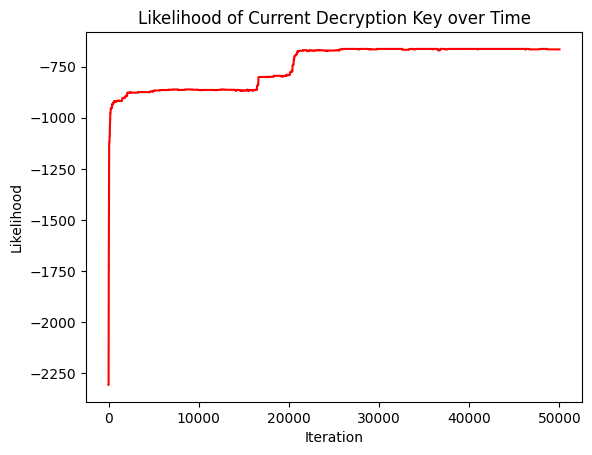

Text(0.5, 1.0, 'Cumulative Proportion of Accepting Candidate Key')

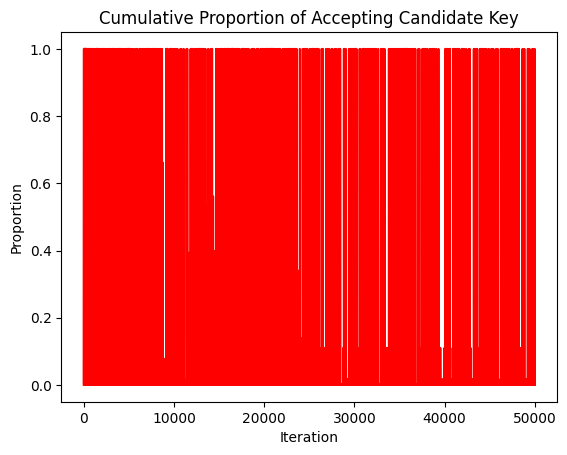

In [34]:
## Add a couple graphs --- namely, plausibility vs iteration, and the cumulative acceptance rate over time (i.e. percentage of iterations that have been accepted up until that point)

# Plausibility 

plt.plot(list(range(numIterations)), plausibility, color = 'r')
plt.xlabel('Iteration')
plt.ylabel('Likelihood')
plt.title('Likelihood of Current Decryption Key over Time')
plt.show()

cumSumAccept = np.cumsum(accept)
cumProportion = cumSumAccept / list(range(1, numIterations + 1))
# plot


plt.plot(list(range(1, numIterations + 1)), acceptanceProbabilities, color = 'r')
plt.xlabel('Iteration')
plt.ylabel('Proportion')
plt.title('Cumulative Proportion of Accepting Candidate Key')